In [349]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker
from matplotlib import rcParams
pd.options.display.float_format = '{}'.format

import warnings
warnings.filterwarnings('ignore')

# Feb 19

* Density plot
* Density plot(without single-element-group)
* Heatmap

In [350]:
# Prepare file
df = pd.read_csv("http://dada2020.xyz/dada/Data.csv", dtype=str)

In [351]:
df = df.iloc[:,0:11]
df[["Passive", "Active","Constructive","Interactive"]] = df[["Passive", "Active","Constructive","Interactive"]].apply(pd.to_numeric)
df = df.fillna(0)
df['Time'] = pd.to_datetime(df['Time stamp'])
df['ID'] = range(1538)

### Assign weight to PACI (1,2,3,4)

In [352]:
# assign weight to PACI (1,2,3,4)
df['Active'] = df['Active']*2
df['Constructive'] = df['Constructive']*3
df['Interactive'] = df['Interactive']*4

In [353]:
# split into different time zones
df_s1 = df[df['Time']<='2017-10-15'] #795
df_s2 = df[df['Time']>'2017-10-15'] #743
df_s1_t1 = df[df['Time']<='2017-09-20'] #412
df_s1_t2 = df[ (df['Time']>'2017-09-20') & (df['Time']<'2017-10-15') ] #383
df_s2_t1 = df[ (df['Time']>'2017-10-15')&(df['Time']<='2017-11-02') ] #437
df_s2_t2 = df[ (df['Time']>'2017-11-02') ] #306

# Distribution plot

### Define function for plotting

In [354]:
# distribution plot of mean PACI
PACI_mean_combine = []
def dist_plot(tmp, ID):
    PACI_sum = tmp.groupby(ID)["Passive", "Active","Constructive","Interactive"].sum()
    Student_count = tmp.groupby(ID)['ID'].count()
    PACI_mean = PACI_sum.sum(axis=1)/Student_count
    plt.hist(PACI_mean)
    PACI_mean_combine.append(PACI_mean)

# distribution plot of ratio PACI
    a = PACI_sum.sum(axis=1)
    b = PACI_sum/a[:,None]
    fig, ax = plt.subplots(figsize=(5,4), dpi=100)
    ax.set_xlim(0,1)
    plt.hist(b['Active'], alpha=0.3, label='Active')
    plt.hist(b['Passive'], alpha=0.3, label='Passive')
    plt.hist(b['Constructive'], alpha=0.3, label='Constructive')
    plt.hist(b['Interactive'], alpha=0.3, label='Interactive')
    plt.legend()

### mean+ratio PACI by students in semester1 t1

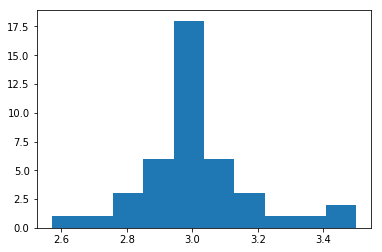

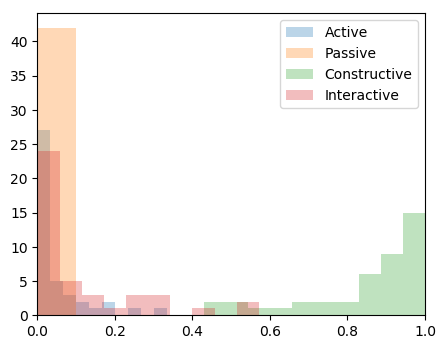

In [355]:
dist_plot(df_s1_t1,['Student ID'])

### mean+ratio PACI by students in semester1 t2

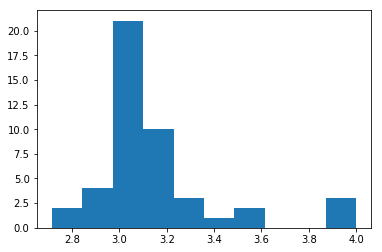

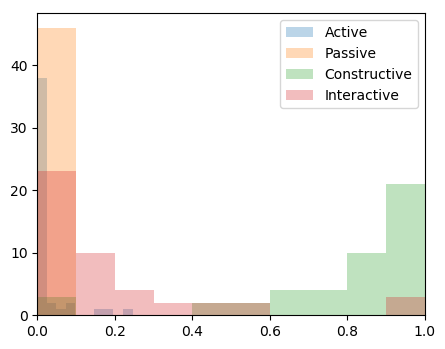

In [356]:
dist_plot(df_s1_t2,['Student ID'])

### mean+ratio PACI by groups in semester1 t1

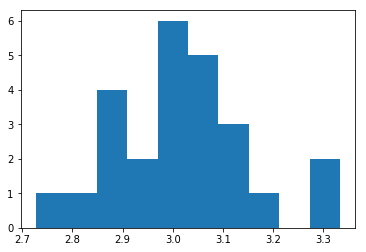

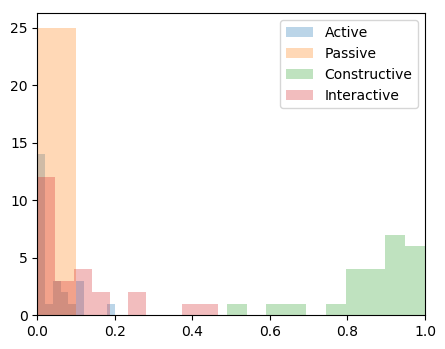

In [357]:
dist_plot(df_s1_t1,['Group ID'])

### mean+ratio PACI by groups in semester1 t2

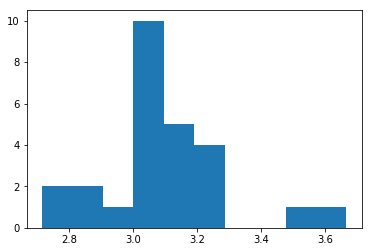

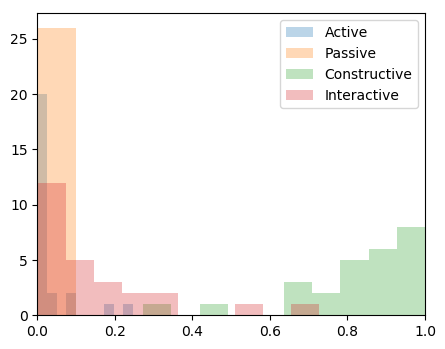

In [358]:
dist_plot(df_s1_t2,['Group ID'])

### mean+ratio PACI by student in semester1

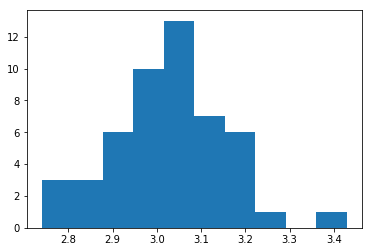

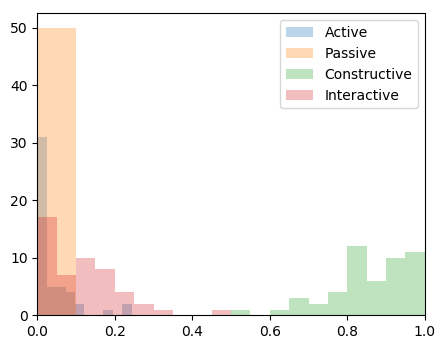

In [359]:
dist_plot(df_s1,['Student ID'])

### mean+ratio PACI by student in semester2

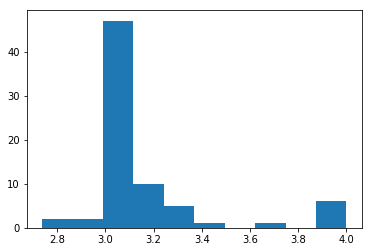

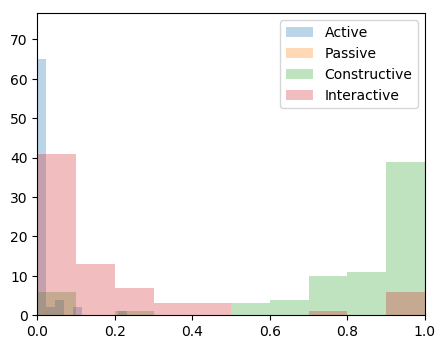

In [360]:
dist_plot(df_s2,['Student ID'])

### mean PACI  (distribution plots combined)

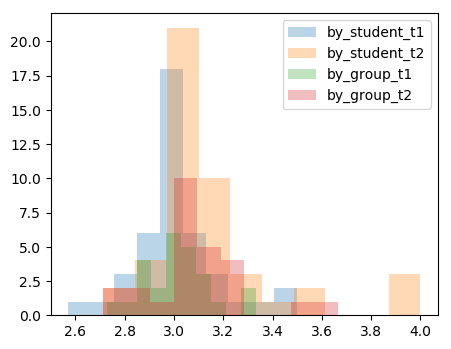

In [361]:
fig, ax = plt.subplots(figsize=(5,4), dpi=100)
plt.hist(PACI_mean_combine[0], alpha=0.3, label='by_student_t1')
plt.hist(PACI_mean_combine[1], alpha=0.3, label='by_student_t2')
plt.hist(PACI_mean_combine[2], alpha=0.3, label='by_group_t1')
plt.hist(PACI_mean_combine[3], alpha=0.3, label='by_group_t2')
plt.legend()

### mean PACI (boxplots combined)

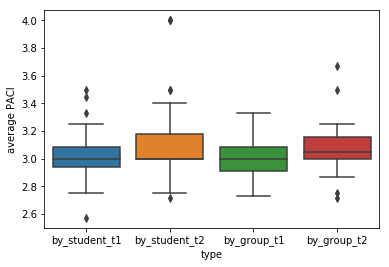

In [362]:
s1 = pd.DataFrame(PACI_mean_combine[0])
s1.columns=['average PACI']
s1.index.names = ['ID']
s1['type'] = 'by_student_t1'

s2 = pd.DataFrame(PACI_mean_combine[1])
s2.columns=['average PACI']
s2.index.names = ['ID']
s2['type'] = 'by_student_t2'

g1 = pd.DataFrame(PACI_mean_combine[2])
g1.columns=['average PACI']
g1.index.names = ['ID']
g1['type'] = 'by_group_t1'

g2 = pd.DataFrame(PACI_mean_combine[3])
g2.columns=['average PACI']
g2.index.names = ['ID']
g2['type'] = 'by_group_t2'

combine = pd.concat([s1, s2, g1, g2], axis=0, sort=False)
ax = sns.boxplot(x="type", y="average PACI", data=combine)

# Density plot (without single-element-group)
### Some groups contain only one student, need to be removed

In [363]:
df.groupby(['Group ID'])['Student ID'].unique()

Group ID
AJ                                      [458, 502, 081]
AK                                                [379]
AM                                           [527, 967]
AT                                           [892, 019]
BA                                           [062, 070]
BF                                                [228]
BS                                                [229]
CD                                                [714]
CG                                                [666]
CZ                                                [588]
EB                                      [428, 451, 649]
EI                                      [196, 493, 892]
EL                                                [338]
ER                                                [901]
EW                                           [365, 641]
FW                                                [019]
GC                                           [070, 306]
HM                                     

### Only keep groups containing more than one student

In [364]:
tmp = df.groupby(['Group ID'])['Student ID'].unique()
intergroup = []
groups = pd.DataFrame({'Group ID': tmp.index,'Student ID':tmp.values})
for i in range(len(groups)):
    if len(groups.iloc[i]['Student ID'])>1:
        intergroup.append(groups.iloc[i]['Group ID'])
df2 = df[df['Group ID'].isin(intergroup)]

In [365]:
# split into different time zones
df_s1 = df2[df2['Time']<='2017-10-15'] #795 -> 579
df_s2 = df2[df2['Time']>'2017-10-15'] #743 -> 502
df_s1_t1 = df2[df2['Time']<='2017-09-20'] #412 -> 314
df_s1_t2 = df2[ (df2['Time']>'2017-09-20') & (df['Time']<'2017-10-15') ] #383 -> 265
df_s2_t1 = df2[ (df2['Time']>'2017-10-15')&(df['Time']<='2017-11-02') ] #437 -> 272
df_s2_t2 = df2[ (df2['Time']>'2017-11-02') ] #306 -> 230

### Plot

In [366]:
PACI_mean_combine = []

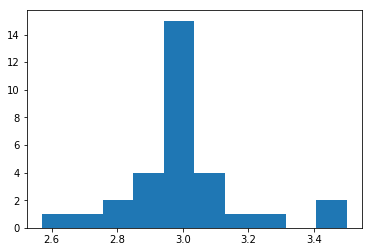

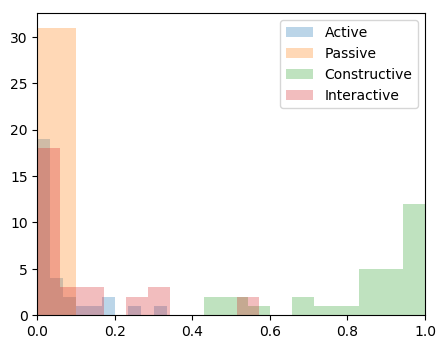

In [367]:
# mean+ratio PACI by student in semester1 t1
dist_plot(df_s1_t1, ['Student ID'])

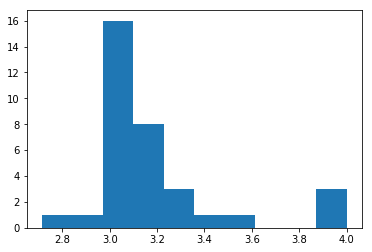

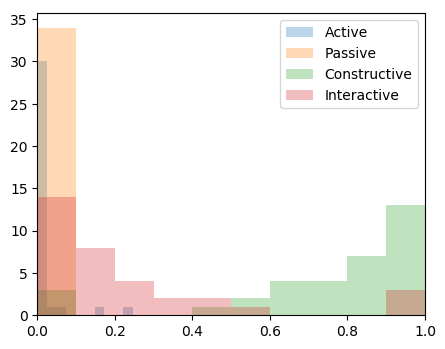

In [368]:
# mean+ratio PACI by student in semester1 t2
dist_plot(df_s1_t2, ['Student ID'])

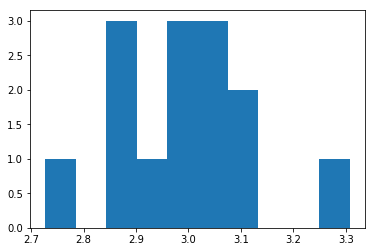

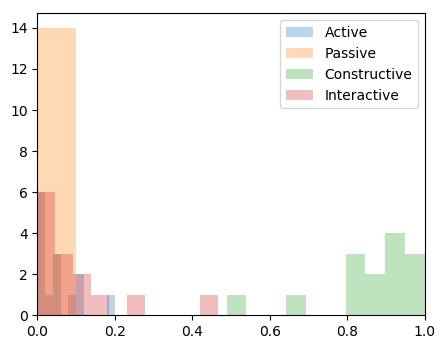

In [369]:
# mean+ratio PACI by group in semester1 t1
dist_plot(df_s1_t1, ['Group ID'])

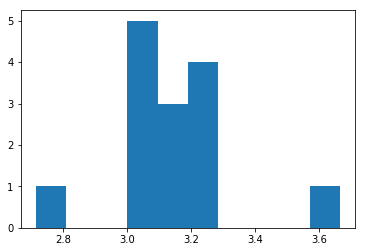

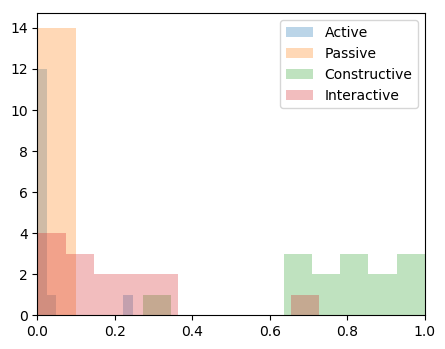

In [370]:
# mean+ratio PACI by group in semester1 t2
dist_plot(df_s1_t2, ['Group ID'])

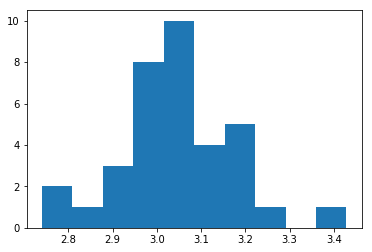

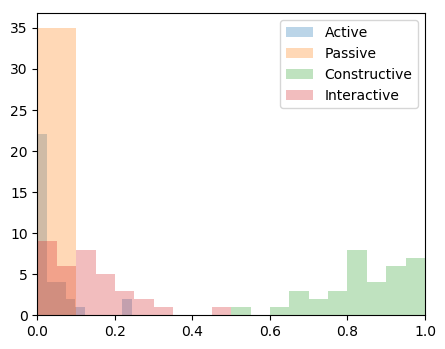

In [371]:
# mean+ratio PACI by student in semester1
dist_plot(df_s1, ['Student ID'])

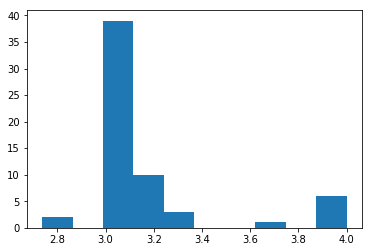

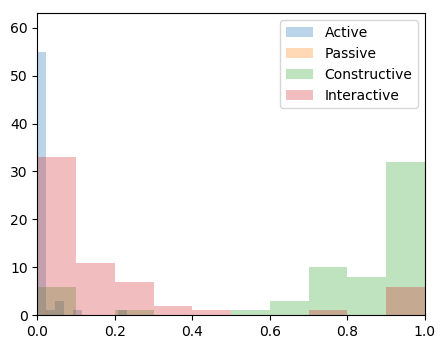

In [372]:
# mean+ratio PACI by student in semester2
dist_plot(df_s2, ['Student ID'])

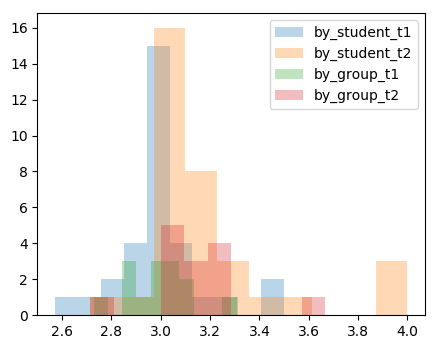

In [373]:
fig, ax = plt.subplots(figsize=(5,4), dpi=100)
plt.hist(PACI_mean_combine[0], alpha=0.3, label='by_student_t1')
plt.hist(PACI_mean_combine[1], alpha=0.3, label='by_student_t2')
plt.hist(PACI_mean_combine[2], alpha=0.3, label='by_group_t1')
plt.hist(PACI_mean_combine[3], alpha=0.3, label='by_group_t2')
plt.legend()

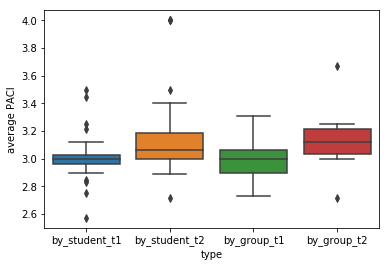

In [374]:
s1 = pd.DataFrame(PACI_mean_combine[0])
s1.columns=['average PACI']
s1.index.names = ['ID']
s1['type'] = 'by_student_t1'

s2 = pd.DataFrame(PACI_mean_combine[1])
s2.columns=['average PACI']
s2.index.names = ['ID']
s2['type'] = 'by_student_t2'

g1 = pd.DataFrame(PACI_mean_combine[2])
g1.columns=['average PACI']
g1.index.names = ['ID']
g1['type'] = 'by_group_t1'

g2 = pd.DataFrame(PACI_mean_combine[3])
g2.columns=['average PACI']
g2.index.names = ['ID']
g2['type'] = 'by_group_t2'

combine = pd.concat([s1, s2, g1, g2], axis=0, sort=False)
ax = sns.boxplot(x="type", y="average PACI", data=combine)

# Heatmap (with group containing more than one student)

In [375]:
from scipy.spatial import distance_matrix

### Define function for mean PACI

In [376]:
def meanPACI_heat(tmp):
    #tmp = df_s1_t1
    ID = ['Student ID']
    
    #groupby 'Student ID'
    PACI = tmp.groupby(ID)["Passive", "Active","Constructive","Interactive"]
    
    #calculate sum for each of PACI
    PACI_sum = PACI.sum()
    
    #calculate number of posts for each student 
    Student_count = tmp.groupby(ID)['ID'].count()
    
    #calculate mean PACI for each student
    PACI_mean = PACI_sum.sum(axis=1)/Student_count
    
    #convert result to dataframe
    dd = pd.DataFrame({'Student ID':PACI_mean.index,'meanPACI':PACI_mean.values})
    
    #add group information
    dd = pd.merge(dd,  tmp[['Group ID','Student ID']], on='Student ID', how='left')
    dd = dd.drop_duplicates()
    
    #sort by 'Group ID'
    dd = dd.sort_values(by=['Group ID'])
    dd.index = range(len(dd))
    print(dd)
    
    #output dataframe for distancematrix functin
    ee = pd.DataFrame({'meanPACI':dd['meanPACI'].values},index=dd['Student ID'])
    
    return ee
    #print(len(PACI_mean))

### Heatmap for mean PACI in semester1 t1

   Student ID           meanPACI Group ID
0         649                3.5       EB
1         451  3.090909090909091       EB
2         428                3.0       EB
3         892 3.2142857142857144       EI
4         196                3.0       EI
5         070 2.8947368421052633       GC
6         306 2.8333333333333335       GC
7         248                3.0       HM
8         291                3.0       HM
9         746               2.75       LH
10        458                3.0       LH
11        023  2.909090909090909       QT
12        211                3.0       QT
13        714  3.090909090909091       RF
14        967                3.0       RF
15        365                3.0       SN
16        282                3.0       SN
17        527 2.8461538461538463       UH
18        681                2.9       UH
19        128 2.5714285714285716       UU
20        424                3.0       UU
21        929                3.0       UY
22        062 3.4444444444444446  

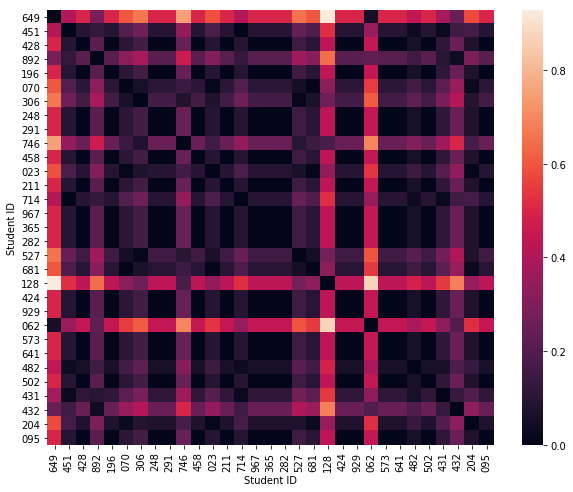

In [377]:
df = meanPACI_heat(df_s1_t1)
mt = pd.DataFrame(distance_matrix(df.values, df.values), index=df.index, columns=df.index)
fig, ax = plt.subplots(figsize=(10,8)) 
sns.heatmap(mt, xticklabels=mt.columns, yticklabels=mt.columns, ax=ax)

### Heatmap for mean PACI in semester1 t2

   Student ID           meanPACI Group ID
0         649                3.0       EB
1         451                3.0       EB
2         428  3.142857142857143       EB
3         892                3.5       EI
4         196 3.1666666666666665       EI
5         493                3.0       EI
6         306 2.7142857142857144       GC
7         248               3.25       HM
8         291 3.1818181818181817       HM
9         746  3.111111111111111       LH
10        458             3.1875       LH
11        379                3.0       LH
12        023                3.0       QT
13        211 3.3333333333333335       QT
14        714                4.0       RF
15        967 3.1818181818181817       RF
16        365              3.125       SN
17        282               3.25       SN
18        681                3.0       UH
19        527                3.0       UH
20        128  2.888888888888889       UU
21        695  3.142857142857143       UU
22        424 3.0416666666666665  

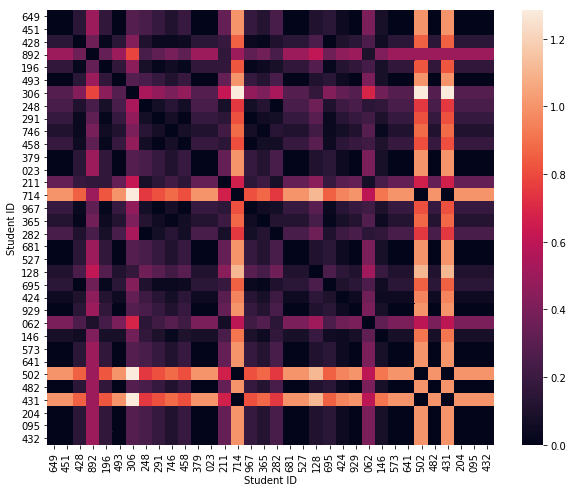

In [378]:
df = meanPACI_heat(df_s1_t2)
mt = pd.DataFrame(distance_matrix(df.values, df.values), index=df.index, columns=df.index)
fig, ax = plt.subplots(figsize=(10,8)) 
sns.heatmap(mt, xticklabels=mt.columns, yticklabels=mt.columns, ax=ax)

### Define function for plotting heatmap on ACI

In [379]:
def ACI_heat(tmp,fraction):    
    #tmp = df_s1_t1
    ID = 'Student ID'
    #fraction = 'Active'
    
    fractions = tmp.groupby(ID)[["Passive", "Active","Constructive","Interactive"]].mean()
    
    #add group information
    dd = pd.merge(fractions,  tmp[['Group ID','Student ID']], on='Student ID', how='left')
    dd = dd.drop_duplicates()
    
    #sort by 'Group ID'
    dd = dd.sort_values(by=['Group ID'])
    dd.index = range(len(dd))
    
    #output dataframe for distancematrix functin
    df = pd.DataFrame(dd[fraction].values,index=dd['Student ID'], columns=[fraction]) 
    print(df)
    print(len(df))
    
    #plot heatmap
    mt = pd.DataFrame(distance_matrix(df.values, df.values), index=df.index, columns=df.index)
    fig, ax = plt.subplots(figsize=(10,8)) 
    sns.heatmap(mt, xticklabels=mt.columns, yticklabels=mt.columns, ax=ax)

### heatmap on 'Active' in semester1 t1

                        Active
Student ID                    
649                        0.0
451                        0.0
428                        0.0
892                        0.0
196         0.4444444444444444
070        0.21052631578947367
306         0.6666666666666666
248                        0.0
291                        0.0
746                        0.5
458                        0.0
023        0.18181818181818182
211                        0.0
714                        0.0
967                        0.0
365                        0.0
282        0.13333333333333333
527         0.3076923076923077
681                        0.2
128         0.8571428571428571
424                        0.0
929                        0.5
062                        0.0
573                        0.0
641                        0.0
482                        0.0
502                      0.125
431                        0.0
432                        0.0
204        0.15384615384615385
095     

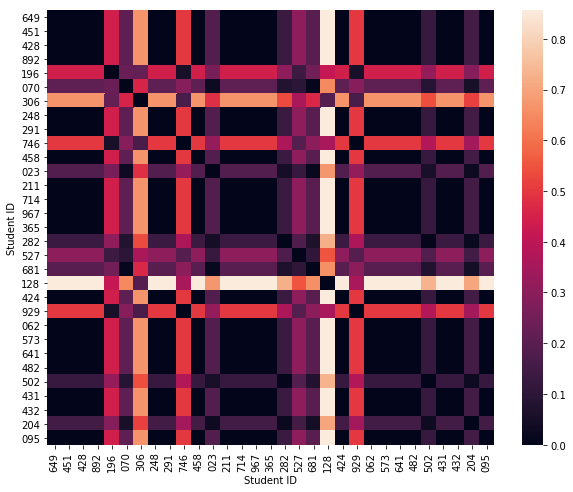

In [380]:
ACI_heat(df_s1_t1,'Active')

### heatmap on 'Active' in semester1 t2

                        Active
Student ID                    
649                        0.0
451                        0.0
428                        0.0
892                        0.0
196                        0.0
493                        0.0
306         0.6666666666666666
248                        0.0
291                        0.0
746                        0.0
458                        0.0
379                        0.0
023                        0.0
211                        0.0
714                        0.0
967                        0.0
365                        0.0
282                        0.0
681                        0.0
527                        0.0
128         0.4444444444444444
695                        0.0
424        0.08333333333333333
929                        0.0
062                        0.0
146                        0.0
573        0.16666666666666666
641                        0.0
502                        0.0
482                        0.0
431     

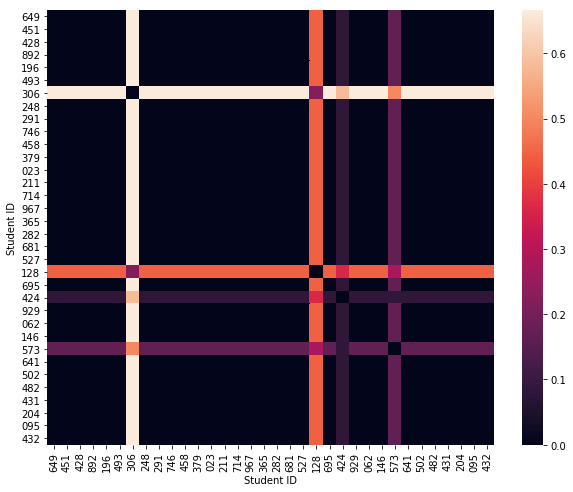

In [381]:
ACI_heat(df_s1_t2,'Active')

### heatmap on 'Constructive' in semester1 t1

                 Constructive
Student ID                   
649                       1.5
451         2.727272727272727
428                       3.0
892         2.357142857142857
196        1.6666666666666667
070        2.6842105263157894
306                       1.5
248                       3.0
291                       3.0
746                      2.25
458                       3.0
023         2.727272727272727
211                       3.0
714         2.727272727272727
967                       3.0
365                       3.0
282                       2.6
527        2.5384615384615383
681                       2.7
128        1.7142857142857142
424                       3.0
929                       1.5
062        1.6666666666666667
573                       3.0
641                       3.0
482         2.823529411764706
502                     2.625
431        2.6470588235294117
432                      2.25
204         2.769230769230769
095                       3.0
31


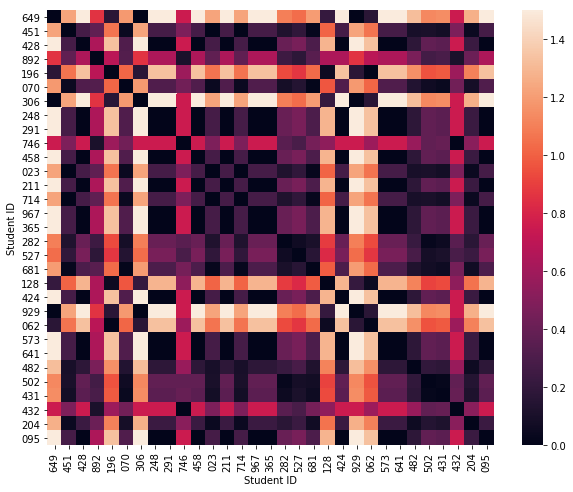

In [382]:
ACI_heat(df_s1_t1,'Constructive')

### heatmap on 'Constructive' in semester1 t2

                 Constructive
Student ID                   
649                       3.0
451                       3.0
428        2.5714285714285716
892                       1.5
196                       2.5
493                       3.0
306        1.8571428571428572
248                      2.25
291        2.4545454545454546
746        2.6666666666666665
458                    2.4375
379                       3.0
023                       3.0
211                       2.0
714                       0.0
967        2.4545454545454546
365                     2.625
282                      2.25
681                       3.0
527                       3.0
128                       2.0
695        2.5714285714285716
424                     2.625
929                       3.0
062                       1.8
146                      2.75
573                       2.5
641                       3.0
502                       0.0
482                       3.0
431                       0.0
204       

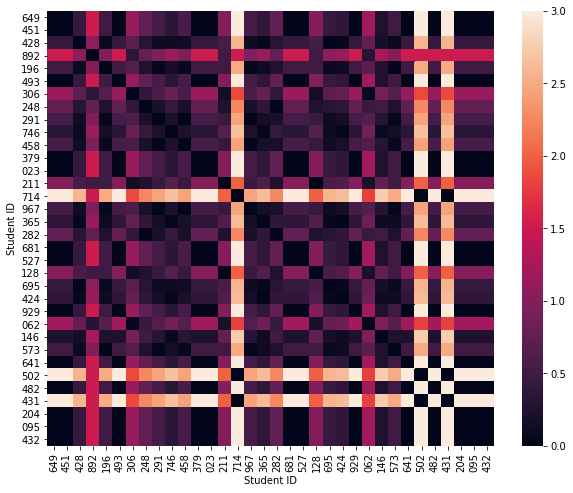

In [383]:
ACI_heat(df_s1_t2,'Constructive')

### heatmap on 'Interactive' in semester1 t1

                   Interactive
Student ID                    
649                        2.0
451        0.36363636363636365
428                        0.0
892         0.8571428571428571
196         0.8888888888888888
070                        0.0
306         0.6666666666666666
248                        0.0
291                        0.0
746                        0.0
458                        0.0
023                        0.0
211                        0.0
714        0.36363636363636365
967                        0.0
365                        0.0
282        0.26666666666666666
527                        0.0
681                        0.0
128                        0.0
424                        0.0
929                        1.0
062         1.7777777777777777
573                        0.0
641                        0.0
482        0.23529411764705882
502                       0.25
431        0.47058823529411764
432                        1.0
204                        0.0
095     

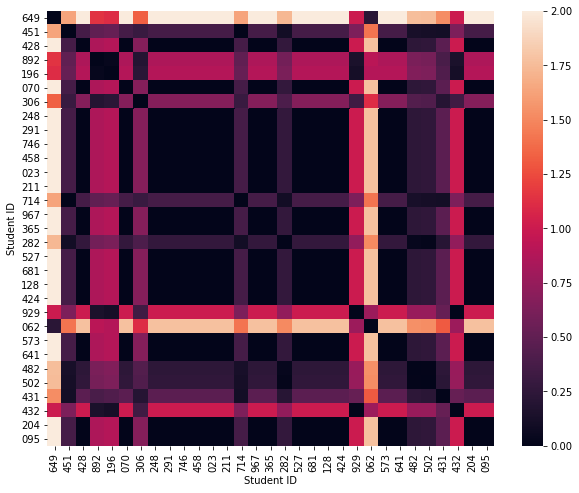

In [384]:
ACI_heat(df_s1_t1,'Interactive')

### heatmap on 'Interactive' in semester1 t2

                   Interactive
Student ID                    
649                        0.0
451                        0.0
428         0.5714285714285714
892                        2.0
196         0.6666666666666666
493                        0.0
306        0.19047619047619047
248                        1.0
291         0.7272727272727273
746         0.4444444444444444
458                       0.75
379                        0.0
023                        0.0
211         1.3333333333333333
714                        4.0
967         0.7272727272727273
365                        0.5
282                        1.0
681                        0.0
527                        0.0
128         0.4444444444444444
695         0.5714285714285714
424         0.3333333333333333
929                        0.0
062                        1.6
146         0.3333333333333333
573         0.3333333333333333
641                        0.0
502                        4.0
482                        0.0
431     

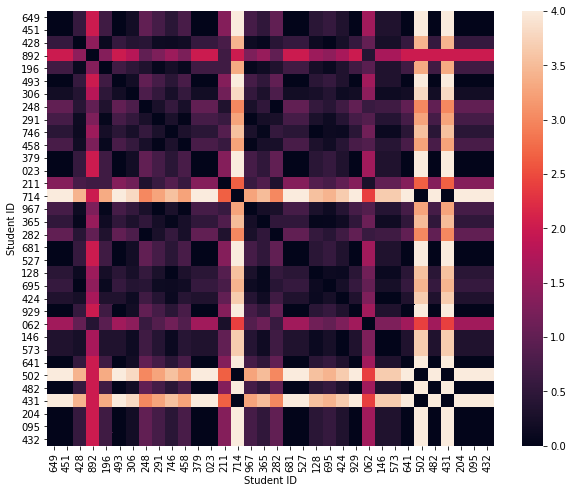

In [385]:
ACI_heat(df_s1_t2,'Interactive')

### On all average PACI for semester1 t1 t2

           Passive              Active       Constructive         Interactive
Student ID                                                                   
649            0.0                 0.0                1.5                 2.0
451            0.0                 0.0  2.727272727272727 0.36363636363636365
428            0.0                 0.0                3.0                 0.0
892            0.0                 0.0  2.357142857142857  0.8571428571428571
196            0.0  0.4444444444444444 1.6666666666666667  0.8888888888888888
070            0.0 0.21052631578947367 2.6842105263157894                 0.0
306            0.0  0.6666666666666666                1.5  0.6666666666666666
248            0.0                 0.0                3.0                 0.0
291            0.0                 0.0                3.0                 0.0
746            0.0                 0.5               2.25                 0.0
458            0.0                 0.0                3.0       

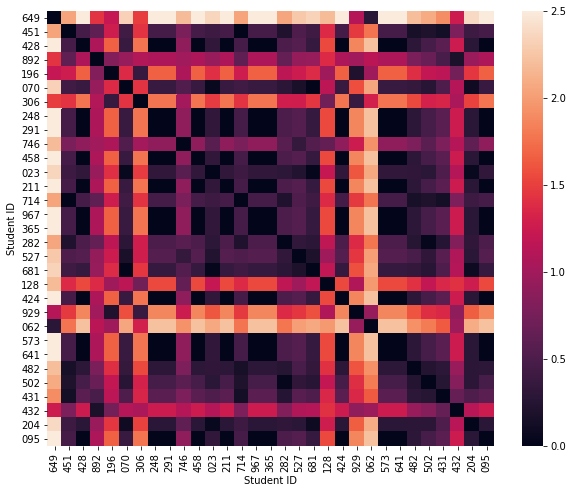

In [389]:
ACI_heat(df_s1_t1,['Passive','Active','Constructive','Interactive'])

           Passive              Active       Constructive         Interactive
Student ID                                                                   
649            0.0                 0.0                3.0                 0.0
451            0.0                 0.0                3.0                 0.0
428            0.0                 0.0 2.5714285714285716  0.5714285714285714
892            0.0                 0.0                1.5                 2.0
196            0.0                 0.0                2.5  0.6666666666666666
493            0.0                 0.0                3.0                 0.0
306            0.0  0.6666666666666666 1.8571428571428572 0.19047619047619047
248            0.0                 0.0               2.25                 1.0
291            0.0                 0.0 2.4545454545454546  0.7272727272727273
746            0.0                 0.0 2.6666666666666665  0.4444444444444444
458            0.0                 0.0             2.4375       

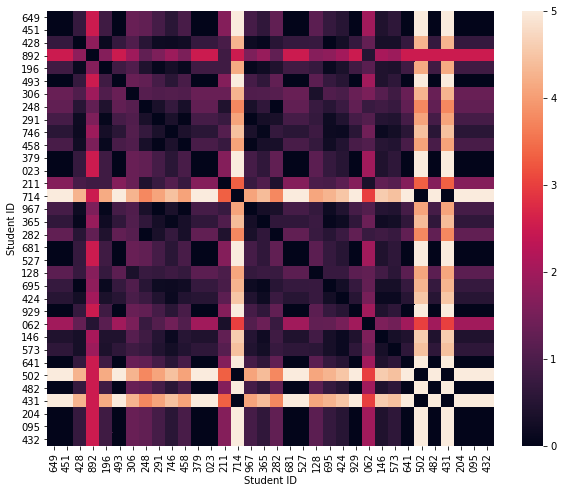

In [390]:
ACI_heat(df_s1_t2,['Passive','Active','Constructive','Interactive'])